SCC-ICMC-USP - 2o. semestre de 2023 </br>
**SCC275 - INTRODUÇÃO A CIENCIA DE DADOS** </br>
**Exercício 6** </br>
Profa. Roseli A. F. Romero </br>

##OBJETIVO: Curva ROC e Teste de hipótese
Nro do grupo:

Alunos:

Danilo Carneiro

Roger Rafael



## Funções novas utilizadas no exercício

- `pandas.Series.nunique()` ([link](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.nunique.html)): Conta quantidade de valores únicos de uma coluna. Útil para verificar se uma coluna é relevante ou não
- `scipy.stats.ttest_ind()` ([link](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html#scipy.stats.ttest_ind)): Calcula o teste t para duas amostras independentes
- `sklearn.metrics.plot_roc_curve()` ([link](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_roc_curve.html)): Plota a curva ROC de um classificador dado um conjunto de input e alvo

### Questão 01.

Faça a exploração dos dados. Isto é, carregue, substitua valores faltantes, padronize os dados, etc. Para este exercicio será utilizado o conjunto de dados: titanic.csv.

Faça também a seleção dos atributos que achar mais relevantes.

 - Dica: Utilize a função `nunique()` durante a exploração dos dados. Você pode utilizar o "bom senso" (além de outras ferramentas é claro) na hora de escolher qual atributo do conjunto manter

In [20]:
# Download do dataset para o ambiente virtual.
!wget -O titanic.csv "https://drive.google.com/uc?export=download&id=1agkXL_AlnzqjrPKIPwJy01Bkh17GUW-3"

--2023-11-23 17:40:00--  https://drive.google.com/uc?export=download&id=1agkXL_AlnzqjrPKIPwJy01Bkh17GUW-3
Resolving drive.google.com (drive.google.com)... 74.125.134.101, 74.125.134.139, 74.125.134.102, ...
Connecting to drive.google.com (drive.google.com)|74.125.134.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0s-a0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/qu2dctm7sgh6c6pl06gof6aqk0s1h658/1700761200000/17263126637575785733/*/1agkXL_AlnzqjrPKIPwJy01Bkh17GUW-3?e=download&uuid=64426a2d-822b-4446-aeac-fb85f77f1453 [following]
--2023-11-23 17:40:00--  https://doc-0s-a0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/qu2dctm7sgh6c6pl06gof6aqk0s1h658/1700761200000/17263126637575785733/*/1agkXL_AlnzqjrPKIPwJy01Bkh17GUW-3?e=download&uuid=64426a2d-822b-4446-aeac-fb85f77f1453
Resolving doc-0s-a0-docs.googleusercontent.com (doc-0s-a0-docs.googleusercontent.com)... 172.217.204.132, 2607

In [33]:
import pandas as pd
import sklearn as sk
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
dtset = pd.read_csv('titanic.csv')

from sklearn.impute import SimpleImputer


imputer = SimpleImputer(strategy='mean')

col_num = dtset.select_dtypes(include=['number']).columns

imputer.fit_transform(dtset[col_num])

dtset[col_num] = imputer.transform(dtset[col_num])

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(dtset[col_num])

dtset[col_num] = scaler.transform(dtset[col_num])


imputer2 = SimpleImputer(strategy='most_frequent')

col_char = dtset.select_dtypes(include=['category', 'object']).columns

imputer2.fit(dtset[col_char])

dtset[col_char] = imputer2.transform(dtset[col_char])
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

dtset[col_char] = dtset[col_char].apply(encoder.fit_transform)

valoresunicos = dtset.nunique()
colunasdrop = valoresunicos[valoresunicos > 10].index
novodt = dtset.drop(columns=colunasdrop)

print(novodt.nunique())

Survived    2
Pclass      3
Sex         2
SibSp       7
Parch       7
Embarked    3
dtype: int64


### Questão 02.
Utilize os mesmos classificadores usados no Exercicio 6: Decision Tree e KNN.</br>

- a) Separe o conjunto de dados de maneira estratificada (através do parâmetro `stratify` da função `train_test_split`) em 20% para teste e 80% para treino. Depois plote a curva ROC (`sklearn.metrics.plot_roc_curve`) para os dois classificadores (no mesmo gráfico).

- b) O melhor classificador da questão anterior também apresentou melhor desempenho na curva ROC? O que pode ter ocorrido?

- c) Teste 3 diferentes valores de `random_state` na função `train_test_split` e observe o comportamento das curvas.


*   Dica: Para plotar múltiplas curvas ROC no mesmo gráfico, defina uma figura com `fig, ax = plt.subplots()` e passe `ax` como parâmetro da função `plot_roc_curve`. Não se esqueça de passar também o nome do classificador para que o seu gráfico fique mais fácil de interpretar

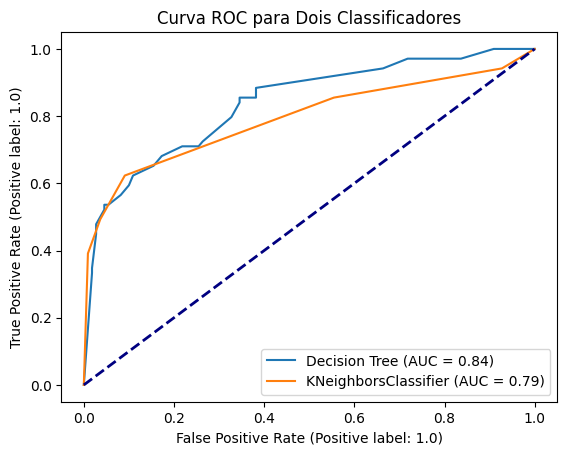

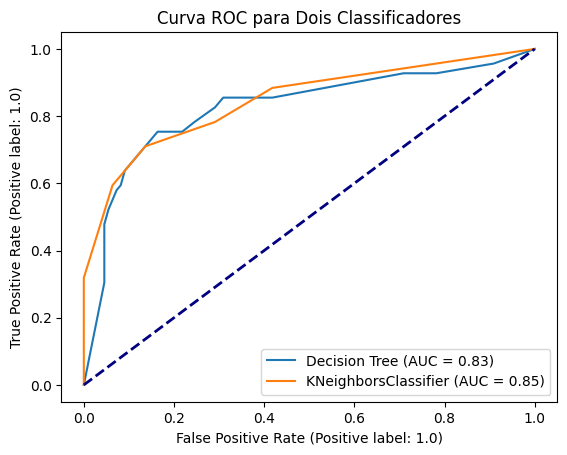

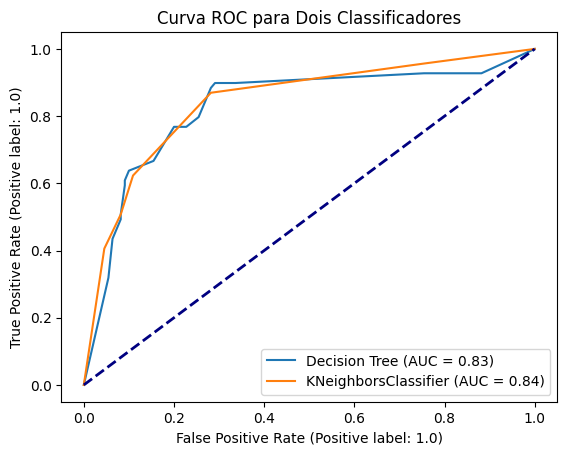

In [68]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


X = novodt.drop('Survived', axis=1)
y = novodt['Survived']
vetor = [42,69,92]
for i in vetor:

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=i)

  clf_rf = DecisionTreeClassifier(random_state=42)
  clf_rf.fit(X_train, y_train)

  clf_lr = KNeighborsClassifier()
  clf_lr.fit(X_train, y_train)

  fig, ax = plt.subplots()

  RocCurveDisplay.from_estimator(clf_rf, X_test, y_test, name='Decision Tree', ax=ax)

  RocCurveDisplay.from_estimator(clf_lr, X_test, y_test, name='KNeighborsClassifier', ax=ax)

  plt.plot([0, 1], [0, 1], color='navy', linestyle='--', lw=2)

  plt.title('Curva ROC para Dois Classificadores')
  plt.legend(loc='lower right')
  plt.show()



### Questão 03.

*   Implemente o 10-Fold Cross Validation (pode usar o scikit) com o melhor classificador, de acordo com a curva ROC,
*   calcule e imprima o valor da acurácia de cada fold na chave 'scores' do
dicionário de classificadores.

In [70]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer, roc_auc_score

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

clf_rf = DecisionTreeClassifier(random_state=42)
scoring_metric = make_scorer(roc_auc_score)

# Realizando a validação cruzada e calculando a acurácia para cada fold
scores = cross_val_score(clf_rf, X, y, cv=cv, scoring=scoring_metric)

# Imprimindo os resultados
results = {'scores': scores}
for i, score in enumerate(scores, start=1):
    print(f'Fold {i}: Acurácia = {score:.4f}')

# Calculando e imprimindo a média das acurácias
mean_accuracy = scores.mean()
print(f'Média das Acurácias: {mean_accuracy:.4f}')

Fold 1: Acurácia = 0.7506
Fold 2: Acurácia = 0.7487
Fold 3: Acurácia = 0.7326
Fold 4: Acurácia = 0.7465
Fold 5: Acurácia = 0.7430
Fold 6: Acurácia = 0.7270
Fold 7: Acurácia = 0.8348
Fold 8: Acurácia = 0.7599
Fold 9: Acurácia = 0.8334
Fold 10: Acurácia = 0.7529
Média das Acurácias: 0.7629
